In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from collections import Counter

In [2]:
# Load the dataset
data = pd.read_csv('Imbalanced_data.csv')

# Separate features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [3]:
# Show class distribution before oversampling
counter_before = Counter(y)
print('Class distribution before oversampling:', counter_before)

Class distribution before oversampling: Counter({0.0: 9899, 1.0: 100})


In [4]:
# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X, y)

In [5]:
# Apply Borderline-SMOTE for oversampling
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', k_neighbors=5)
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)

In [6]:
# Show class distribution after oversampling
counter_after_smote = Counter(y_smote)
counter_after_borderline = Counter(y_borderline_smote)
print('Class distribution after SMOTE:', counter_after_smote)
print('Class distribution after Borderline-SMOTE:', counter_after_borderline)

Class distribution after SMOTE: Counter({0.0: 9899, 1.0: 9899})
Class distribution after Borderline-SMOTE: Counter({0.0: 9899, 1.0: 9899})


<ipython-input-10-5beaddc194aa>:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


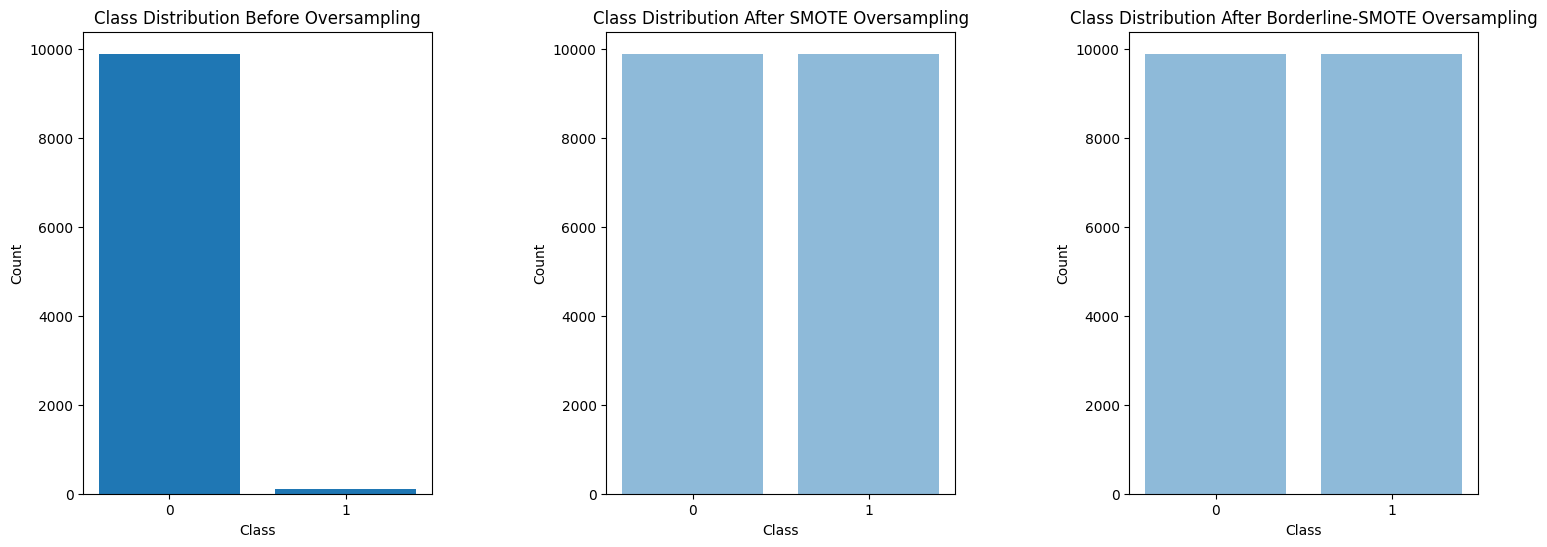

In [10]:
# Plot the distribution before and after oversampling
fig, axs = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'wspace': 0.5})

axs[0].bar(counter_before.keys(), counter_before.values())
axs[0].set_title('Class Distribution Before Oversampling')
axs[0].set_xticks([0, 1])
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

axs[1].bar(counter_after_smote.keys(), counter_after_smote.values(), alpha=0.5, label='SMOTE')
axs[1].set_title('Class Distribution After SMOTE Oversampling')
axs[1].set_xticks([0, 1])
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

axs[2].bar(counter_after_borderline.keys(), counter_after_borderline.values(), alpha=0.5, label='Borderline-SMOTE')
axs[2].set_title('Class Distribution After Borderline-SMOTE Oversampling')
axs[2].set_xticks([0, 1])
axs[2].set_xlabel('Class')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()